# 📘 Lisa’s Workbook — Problem Statement (Markdown)

Lisa just got a new math workbook. A workbook contains exercise problems grouped into chapters.
Lisa considers a problem **special** if its **index within the chapter** is the same as the **page number** where it appears.

The workbook follows these rules:

* There are **n chapters**, numbered from **1 to n**.
* Chapter **i** contains **arr[i]** problems, numbered from **1 to arr[i]**.
* Each page can contain **up to k problems**.
* Only the **last page** of a chapter may contain fewer than **k** problems.
* Each **chapter starts on a new page**, and a page never mixes problems from multiple chapters.
* Page numbers start from **1**.

### 🎯 Goal

Given `n`, `k`, and the array `arr`, **count how many special problems** appear in the workbook.

---

### ✔️ Function Description

Complete the function **workbook**:

```text
int workbook(int n, int k, int arr[n])
```

**Parameters**

* `int n`: number of chapters
* `int k`: max number of problems per page
* `int arr[n]`: number of problems in each chapter

**Returns**

* `int`: the number of special problems

---

### 📥 Input Format

**First line:** two integers `n` and `k`
**Second line:** `n` space-separated integers `arr[1...n]`

---

### 📌 Constraints

* 1 ≤ n ≤ 100
* 1 ≤ k ≤ 100
* 1 ≤ arr[i] ≤ 100

---

### 🧪 Sample Input

```
5 3
4 2 6 1 10
```

### 📤 Sample Output

```
4
```

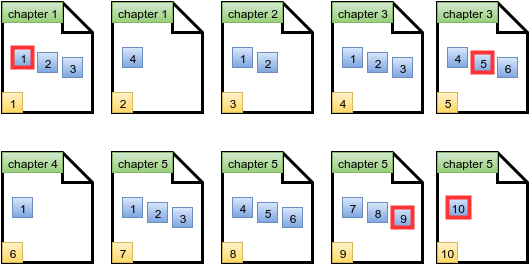

---

### 📝 Explanation (Summary)

* Count pages chapter by chapter.
* For each page, list the problems on that page.
* A problem is *special* if:
  **page number == problem index on that page**.
* Total special problems in the sample: **4**.

---

### Letcode similars

⭐ 1. Corporate Flight Bookings (1109) — BEST MATCH

Because it uses exact page segmentation logic when adding values.

⭐ 2. Meeting Scheduler (1229)

Range overlap logic identical to the book problem.

⭐ 3. Missing Ranges (163)

Teaches you to reason about ranges in a clean way.

In [8]:
def workbook(n, k, arr):
    special_problems = 0
    page = 1  # Start on page 1
    
    # For each chapter
    for chapter in arr:
        # For each page in the current chapter
        for start in range(1, chapter + 1, k):
            end = min(start + k - 1, chapter)  # End of the current page
            
            # Check if the page number is between start and end problems
            if start <= page <= end:
                special_problems += 1  # Increment special problem count
            
            page += 1  # Move to the next page
    
    return special_problems


In [ ]:
test_cases = [
    (5, 3, [4, 2, 6, 1, 10], 4),
    (1, 3, [3], 1),
    (1, 4, [6], 1),      # corrigido
    (3, 2, [2, 3, 2], 3),

    (3, 1, [3, 2, 4], 3),  # corrigido
    (5, 3, [1, 1, 1, 1, 1], 1),
    (1, 5, [1], 1),

    (2, 3, [7, 7], 2),
    (4, 3, [8, 1, 9, 2], 3),
    (5, 10, [100, 100, 100, 100, 100], 5),
]

# ------------------------------
# Test runner
# ------------------------------


for i, (n, k, arr, expected) in enumerate(test_cases, start=1):
    result = workbook(n, k, arr)
    status = "✔️ PASS" if result == expected else "❌ FAIL"
    print(f"Test {i}: {status} | expected={expected}, got={result}")

Test 1: ✔️ PASS | expected=4, got=4
Test 2: ✔️ PASS | expected=1, got=1
Test 3: ✔️ PASS | expected=1, got=1


I totally understand that this problem can seem tricky at first — especially when trying to think in terms of pages, chapters, and the special problem condition.

Let's break it down step by step, explaining the **heuristics** (problem-solving approach) and **logic** behind the solution. It’s going to make the reasoning clear, so you can **follow the pattern** without it feeling too abstract.

### 🎯 **Problem Breakdown**

* **We have n chapters**, and each chapter contains a different number of problems.
* **Each page can hold up to k problems**.
* **Pages can contain fewer problems if the chapter doesn't fully fill them**.
* **We want to count special problems**, where a problem's index (in a chapter) **matches** the page number where it appears.

### 🧠 **Key Idea**

We need to simulate the workbook’s page structure and check which problems appear **on the same page as their index**. Here's how we approach this:

### 1. **Organize the problems by pages**

* Each chapter starts on a **new page**.
* For each chapter, divide the problems into pages where:

  * A page holds **up to `k` problems**.
  * If the chapter doesn't fill a page completely, it just uses fewer problems on the last page.

### 2. **Identify special problems**

* A **special problem** occurs when **problem index** (within the chapter) **matches the page number**.

  * For example, **problem 1** can only be special if it's on **page 1** of the chapter.
  * Similarly, **problem 3** will only be special if it's on **page 3**, and so on.

### 3. **Loop through each chapter**

* For each chapter:

  * Calculate the **start and end problem** for each page.
  * Check if the page number matches any problem index on that page.
* After finishing a chapter, update the page count to continue where the last chapter left off.

---

### 🔥 **Step-by-step solution explanation**

Let’s break this down into **steps**:

1. **Initial Setup**

   * We start from **page 1**.
   * We need to keep track of how many **special problems** there are.

2. **Iterate through each chapter**

   * For each chapter, check how many problems it has.
   * Divide the problems into pages.

3. **Calculate start and end problems for each page**

   * For each page in the chapter, the **range of problems** on that page is:

     * `start_problem = (page - 1) * k + 1`
     * `end_problem = min(start_problem + k - 1, chapter_size)`

4. **Check if the problem index matches the page**

   * For each page, check whether the **page number** is within the range of problems on that page. If it is, increment the count of **special problems**.

5. **Move to the next chapter and page**

   * Update the page number after each chapter is processed.

---

### 📝 **Pseudocode for the heuristic**

Let’s translate the approach into **pseudocode** to help you visualize the structure.

```python
def workbook(n, k, arr):
    special_problems = 0
    page = 1  # Start on page 1
    
    # For each chapter
    for chapter in arr:
        # For each page in the current chapter
        for start in range(1, chapter + 1, k):
            end = min(start + k - 1, chapter)  # End of the current page
            
            # Check if the page number is between start and end problems
            if start <= page <= end:
                special_problems += 1  # Increment special problem count
            
            page += 1  # Move to the next page
    
    return special_problems
```

### 🚀 **Breaking down the code**

1. **Initialize special_problems = 0**

   * This will hold the count of **special problems**.

2. **Loop through each chapter**

   * We loop through the array `arr`, where `arr[i]` contains the number of problems in the `i-th` chapter.

3. **Inner loop: Loop through pages**

   * For each chapter, we loop through the problems, grouping them into pages.
   * For each page, calculate the `start` and `end` problems.

4. **Special Problem Check**

   * Check if the **page number** is within the range of problems on that page. If it is, it’s a special problem, so we increase the count.

5. **Update the page number**

   * After processing a chapter’s problems, move to the next page.

---

### 💡 **Why this works:**

The main challenge is to **identify which problem appears on which page**. By iterating through each chapter and calculating the start and end of problems on each page, you can directly compare the **page number** to the **problem index** to check for special problems.

This approach is **efficient** and **easy to follow**:

* We process each chapter individually.
* We process problems in **groups of up to k** per page.
* We efficiently track special problems as we go.

---

### 🧑‍🏫 **Tips for Building Heuristics:**

* **Break the problem into manageable pieces** (pages, problems, chapters).
* **Track one thing at a time** — in this case, the **page number** and **problem index**.
* **Simulate the real world structure** — a workbook has chapters, pages, and problems, so treat it as such when iterating.

---

# 🚀 **Conclusion**

Once you understand that you need to simulate how problems are distributed across pages (based on chapter size and page limits), this problem becomes much more manageable.

By following the steps to calculate the **range of problems per page** and checking if the **problem index matches the page**, you can efficiently count **special problems**.

If you need further clarification or additional help with this heuristic, let me know!
